<a href="https://colab.research.google.com/github/BraulioHermanson/Machine-Learning-Project/blob/main/Deploy_ML_Rio_aribnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install streamlit

In [ ]:
import pandas as pd
import streamlit as st
import joblib

In [ ]:
x_numericos = {'latitude': 0, 'longitude': 0, 'accommodates': 0, 'bathrooms': 0, 'bedrooms': 0, 'beds': 0, 'extra_people': 0,
               'minimum_nights': 0, 'ano': 0, 'mes': 0, 'n_amenities': 0, 'host_listings_count': 0}

x_tf = {'host_is_superhost': 0, 'instant_bookable': 0}

x_listas = {'property_type': ['Apartment', 'Bed and breakfast', 'Condominium', 'Guest suite', 'Guesthouse', 'Hostel', 'House', 'Loft', 'Outros', 'Serviced apartment'],
            'room_type': ['Entire home/apt', 'Hotel room', 'Private room', 'Shared room'],
            'cancelation_policy': ['flexible', 'moderate', 'strict', 'strict_14_with_grace_period']
            }


dicionario = {}
for item in x_listas:
    for valor in x_listas[item]:
        dicionario[f'{item}_{valor}'] = 0


for item in x_numericos:
    if item == 'latitude' or item == 'longitude':
        valor = st.number_input(f'{item}', step=0.00001, value=0.0, format="%.5f")
    elif item == 'extra_people':
        valor = st.number_input(f'{item}', step=0.01, value=0.0)
    else:
        valor = st.number_input(f'{item}', step=1, value=0)
    x_numericos[item] = valor

for item in x_tf:
    valor = st.selectbox(f'{item}', ('Sim', 'Não'))
    if valor == "Sim":
        x_tf[item] = 1
    else:
        x_tf[item] = 0
    
    
for item in x_listas:
    valor = st.selectbox(f'{item}', x_listas[item])
    dicionario[f'{item}_{valor}'] = 1
    
botao = st.button('Prever Valor do Imóvel')

if botao:
    dicionario.update(x_numericos)
    dicionario.update(x_tf)
    valores_x = pd.DataFrame(dicionario, index=[0])
    modelo = joblib.load('modelo.joblib')
    preco = modelo.predict(valores_x)
    st.write(preco[0])

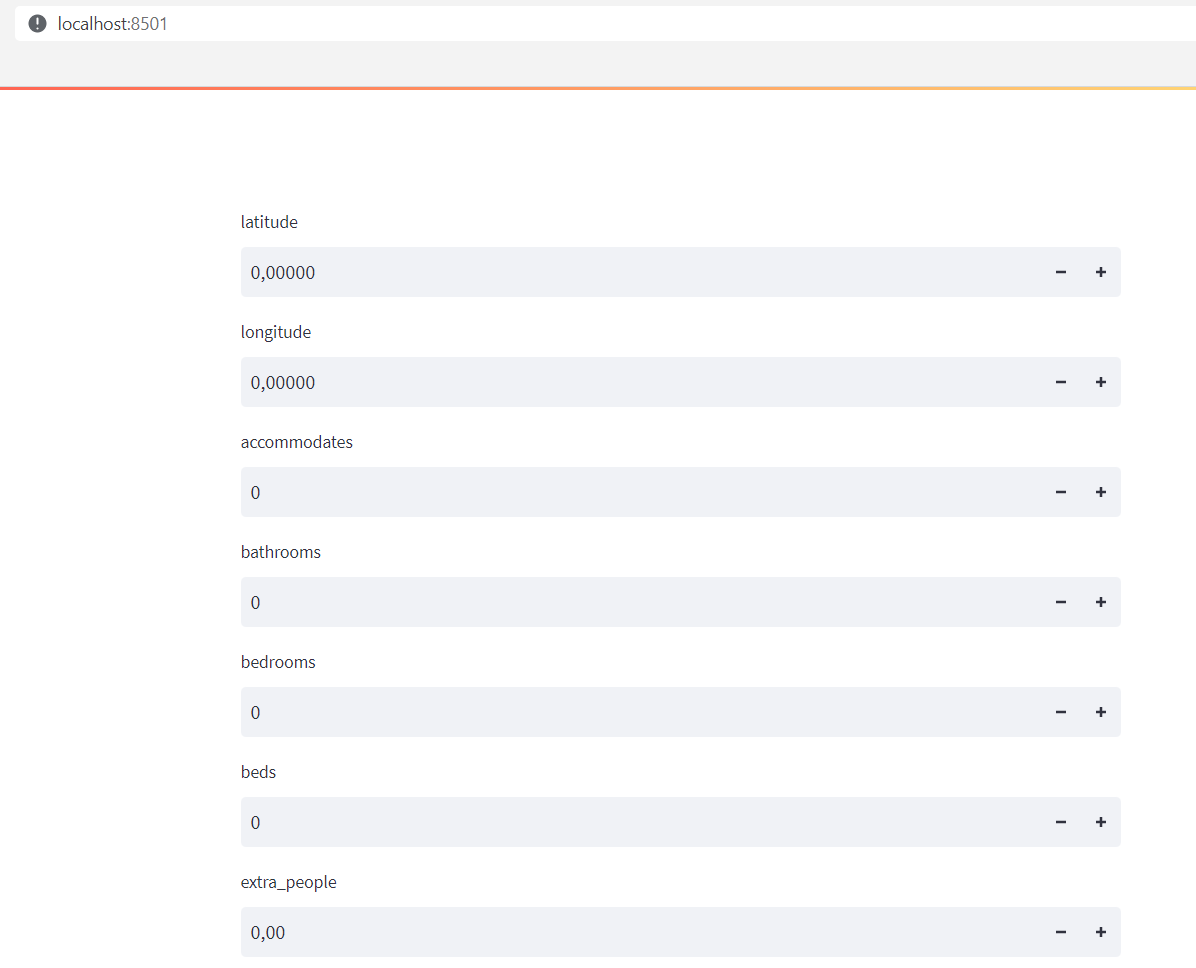

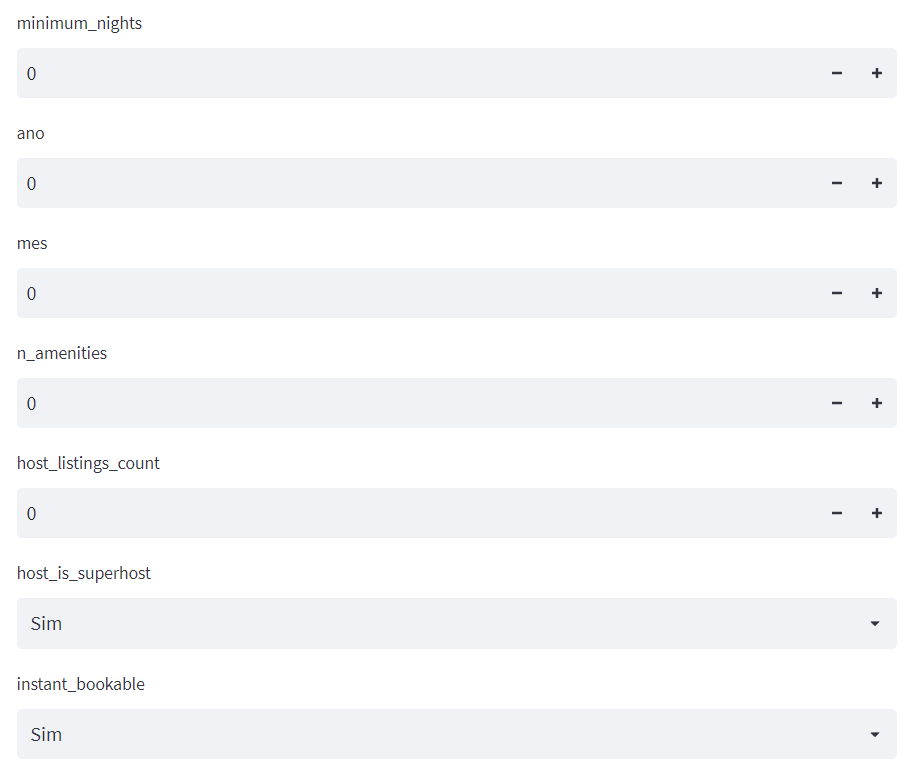

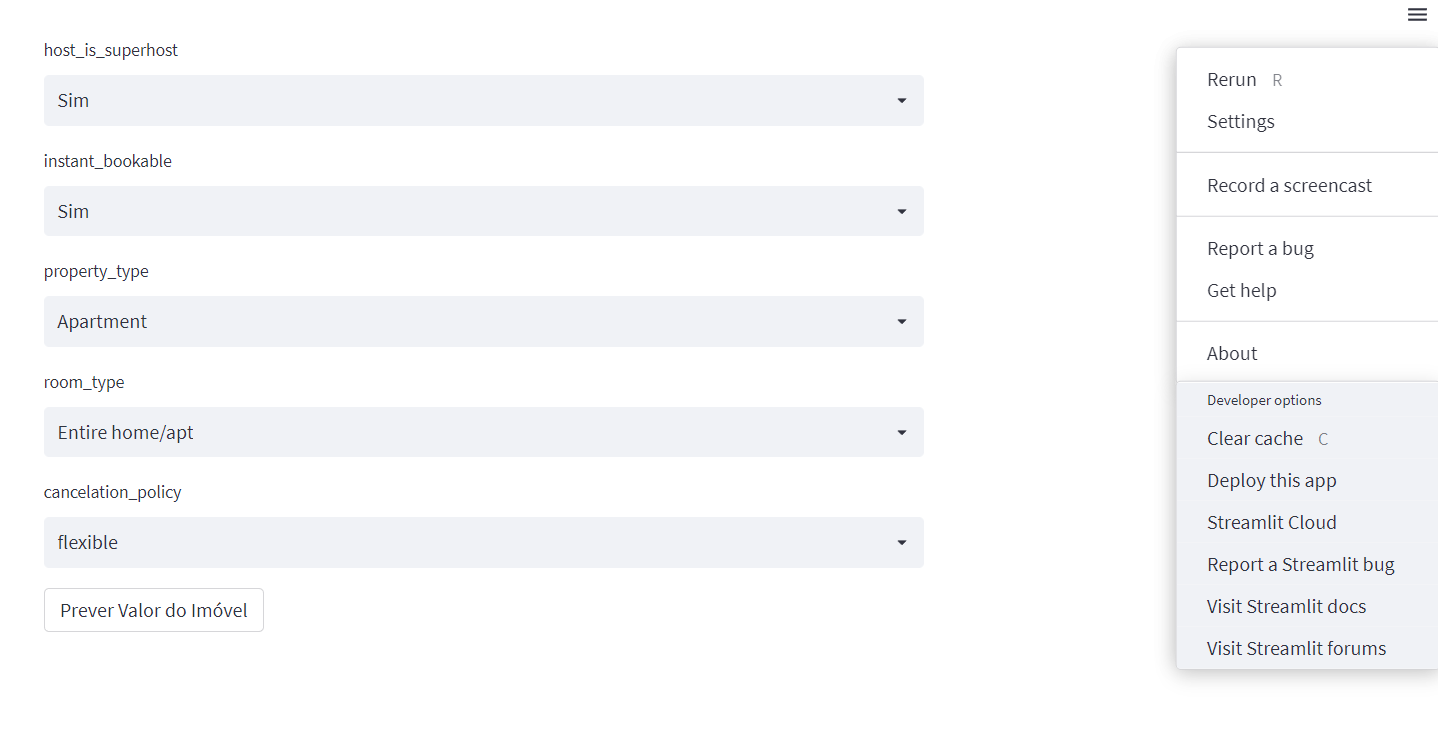